In [22]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import re 

In [23]:
german_credit = pd.read_csv('GermanCredit.csv')
result_df = german_credit.copy()
result_df.replace('none', np.nan, inplace=True)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           93 non-null     object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     186 non-null    object
 14  housing                 1000 non-null   object
 15  exist

#### **PREPROCESSING**

#### [1] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)


In [24]:
def drop_columns(df, n=3):
    i = 0
    while i < n :
        least_useful_column_index = df.count().idxmin()
        df = df.drop(least_useful_column_index, axis =1)
        i+=1
    return df

In [25]:
# Pass in parameter n to drop n number of columns
result_df = drop_columns(result_df)

#### [2] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes

In [26]:
result_df = result_df.applymap(lambda x: str(x).strip("''"))
result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   object
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   object
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   object
 8   personal_status         1000 non-null   object
 9   residence_since         1000 non-null   object
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   object
 12  housing                 1000 non-null   object
 13  existing_credits        1000 non-null   object
 14  job                     1000 non-null   object
 15  num_d

#### [3] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively

In [27]:
result_df['checking_status'] = result_df['checking_status'].apply(str)
no_checking = lambda x: re.sub(r'no checking', 'No Checking', x)
low =lambda x: re.sub(r'<0', 'Low', x)
medium = lambda x: re.sub(r'0<=X<200', 'Medium', x)
high = lambda x: re.sub(r'>=200', 'High', x)
result_df['checking_status'] = result_df['checking_status'].apply(no_checking)
result_df['checking_status'] = result_df['checking_status'].apply(low)
result_df['checking_status'] = result_df['checking_status'].apply(medium)
result_df['checking_status'] = result_df['checking_status'].apply(high)
result_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### [4] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High')

In [28]:
result_df['savings_status'] = result_df['savings_status'].apply(str)
for id, row in result_df.iterrows():
    if row['savings_status'] == 'no known savings':
        result_df.loc[id, 'savings_status'] = 'No Savings'
    if row['savings_status'] == '<100':
        result_df.loc[id, 'savings_status'] = 'Low'
    if row['savings_status'] == '100<=X<500':
        result_df.loc[id, 'savings_status'] = 'Medium'
    if row['savings_status'] == '500<=X<1000':
        result_df.loc[id, 'savings_status'] = 'High'
    if row['savings_status'] == '>=1000':
        result_df.loc[id, 'savings_status'] = 'High'
result_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### [5] Change class column values from 'good' to '1' and 'bad' to '0'

In [29]:
result_df['class'] = result_df['class'].apply(str)
good_class = lambda x: re.sub(r'good', '1', x)
bad_class = lambda x: re.sub(r'bad', '0', x)
result_df['class'] = result_df['class'].apply(good_class)
result_df['class'] = result_df['class'].apply(bad_class)
result_df['class'] = result_df['class'].apply(int)
result_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


#### [6] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range

In [30]:
pd.unique(result_df['employment'])
# unemployed = Unemployed
# <1 = Amateur
# 1<=X<4 = Professional 
# 4<=X<7 = Experienced
# >=7 = Expert

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [31]:
result_df['employment'] = result_df['employment'].apply(str)
Unemployed = lambda x: re.sub(r'unemployed', 'Unemployed', x)
Amateur = lambda x: re.sub(r'<1', 'Amateur', x)
Professional =lambda x: re.sub(r'1<=X<4', 'Professional', x)
Experienced = lambda x: re.sub(r'4<=X<7', 'Experienced', x)
Expert = lambda x: re.sub(r'>=7', 'Expert', x)
result_df['employment'] = result_df['employment'].apply(Unemployed)
result_df['employment'] = result_df['employment'].apply(Amateur)
result_df['employment'] = result_df['employment'].apply(Professional)
result_df['employment'] = result_df['employment'].apply(Experienced)
result_df['employment'] = result_df['employment'].apply(Expert)
result_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


#### **ANALYSIS**

#### [1] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2. One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

##### [a] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad)

In [32]:
g = pd.crosstab(result_df['foreign_worker'],result_df['class'])
g

class,0,1
foreign_worker,,
no,4,33
yes,296,667


##### [b] Similarly, get the count of each category of employment for each category of saving_status

In [33]:
h= pd.crosstab(result_df['employment'], result_df['savings_status'])
h

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [34]:
single_group = result_df.groupby(['personal_status', ]).sum()
single_group.reset_index()
pd.value_counts(single_group.values.flatten())


201    1
30     1
67     1
402    1
dtype: int64

#### [2] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding

In [35]:
result_df['credit_amount'] = result_df['credit_amount'].apply(int)
single_group = result_df.groupby(['personal_status', 'employment']).sum()
avg = single_group['credit_amount'].get_group(('male single', 'Experienced')).mean()
print(f' The average credit amount of single males that have 4 to 7 years of employment is {avg}')
single_group = result_df.groupby(['personal_status', 'employment']).sum()

AttributeError: 'Series' object has no attribute 'get_group'

#### [3] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding

In [36]:
result_df['duration'] =result_df['duration'].apply(int)
result_df.groupby('job', as_index=False, sort= False)['duration'].mean()

,job,duration
0,skilled,21.411111
1,unskilled resident,16.535000
2,high qualif/self emp/mgmt,25.168919
3,unemp/unskilled non res,17.363636


#### [4] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print: 
##### Most common checking status: ...
##### Most common savings status: ...

In [37]:
purpose_group = result_df.groupby('purpose')
a = purpose_group.get_group('education').value_counts('checking_status')
b = purpose_group.get_group('education').value_counts('savings_status')
print(f'Most common checking status: {a.keys()[0]}')
print(f'Most common savings status: {b.keys()[0]}')

Most common checking status: No Checking
Most common savings status: Low


#### **VISUALIZATION**

#### [1] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors

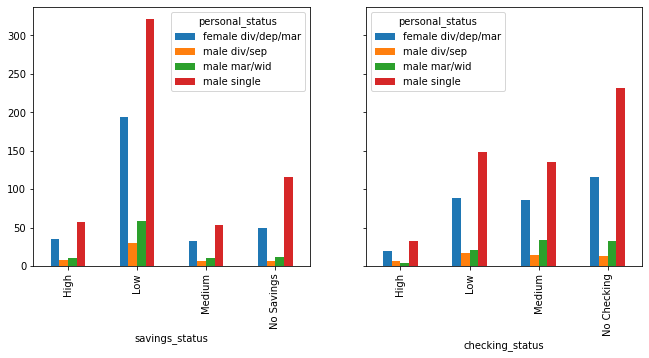

In [38]:
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=True)
fig.tight_layout(pad=4.0)
pd.crosstab(result_df['savings_status'], result_df['personal_status']).plot(kind ='bar', ax = axes[0])
pd.crosstab(result_df['checking_status'], result_df['personal_status']).plot(kind ='bar', ax = axes[1])
plt.show()

#### [2] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis)

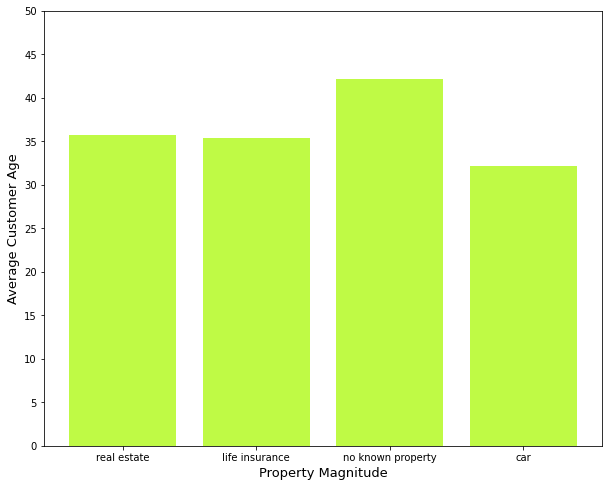

In [39]:
result_df['age'] =result_df['age'].apply(int)
tempdf = result_df[result_df['credit_amount'] > 4000]
g = tempdf.groupby('property_magnitude', as_index=False, sort= False)['age'].mean()
plt.figure(figsize=(10,8))
plt.bar(g['property_magnitude'], g['age'], color= '#bffa45')
plt.yticks(range(0,51,5))
plt.xlabel('Property Magnitude', fontsize = 13)
plt.ylabel('Average Customer Age', fontsize = 13)
plt.show()

#### [3] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
##### a) Personal status
##### b) Credit history
##### c) Job

In [40]:
result_df['age'] = result_df['age'].apply(int)
high_savings = result_df[(result_df['savings_status'] == 'High') &(result_df['age'] > 40)]
high_savings.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
6,No Checking,24,existing paid,furniture/equipment,2835,High,Expert,3,male single,4,life insurance,53,own,1,skilled,1,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,Experienced,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
21,Low,6,existing paid,radio/tv,2647,High,Professional,2,male single,3,real estate,44,rent,1,skilled,2,yes,1
27,High,12,all paid,radio/tv,409,High,Professional,3,female div/dep/mar,3,real estate,42,rent,2,skilled,1,yes,1
81,No Checking,15,existing paid,radio/tv,1213,High,Expert,4,male single,3,life insurance,47,own,1,skilled,1,yes,1
94,Medium,12,existing paid,new car,1318,High,Expert,4,male single,4,real estate,54,own,1,skilled,1,yes,1
137,Medium,12,existing paid,radio/tv,766,High,Professional,4,male single,3,real estate,66,own,1,unskilled resident,1,yes,0
149,No Checking,18,critical/other existing credit,radio/tv,1582,High,Expert,4,male single,4,car,46,own,2,skilled,1,yes,1
177,Low,6,critical/other existing credit,radio/tv,338,High,Expert,4,male single,4,car,52,own,2,skilled,1,yes,1
183,No Checking,24,critical/other existing credit,furniture/equipment,3777,High,Professional,4,male single,4,real estate,50,own,1,skilled,1,yes,1


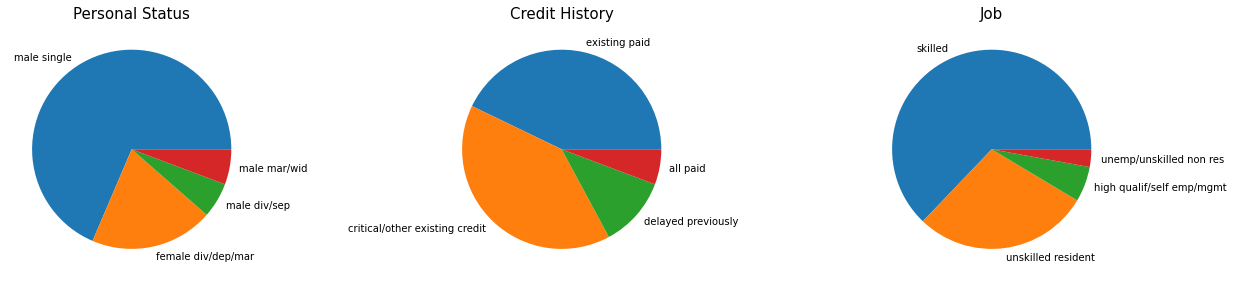

In [41]:
fig, axes = plt.subplots(1,3,figsize=(20,20))
fig.tight_layout(pad =15)
personal = high_savings['personal_status'].value_counts()
credit = high_savings['credit_history'].value_counts()
job = high_savings['job'].value_counts()
axes[0].pie(personal, labels = personal.keys())
axes[0].set_title('Personal Status', fontsize = 15)
axes[1].pie(credit, labels = credit.keys())
axes[1].set_title('Credit History', fontsize = 15)
axes[2].pie(job, labels = job.keys())
axes[2].set_title('Job', fontsize = 15)
plt.show()
